In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from pandas.io.data import DataReader
from datetime import datetime

/Users/jonbaird/anaconda/lib/python3.5/site-packages/pandas/io/data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [4]:
tech_list = ['TXN','NXPI','STM','ADI']

In [5]:
end=datetime.now()
start=datetime(end.year-2,end.month,end.day)

In [6]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [7]:
ADI.describe()

,Open,High,Low,Close,Volume,Adj Close
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,55.742515,56.306257,55.142020,55.730614,2426969.900990,54.054139
std,5.237815,5.266524,5.180997,5.231220,1368275.059575,5.481602
min,42.759998,44.380001,42.570000,43.099998,536300.000000,41.322879
25%,51.669998,52.209999,51.130001,51.650002,1638800.000000,49.653292
50%,54.849998,55.520000,54.389999,54.930000,2094900.000000,53.098664
75%,59.060001,59.779999,58.360001,59.130001,2755000.000000,57.984738
max,68.690002,68.970001,67.800003,68.750000,11994700.000000,67.210449


In [8]:
ADI.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2014-03-11 to 2016-03-10
Data columns (total 6 columns):
Open         505 non-null float64
High         505 non-null float64
Low          505 non-null float64
Close        505 non-null float64
Volume       505 non-null int64
Adj Close    505 non-null float64
dtypes: float64(5), int64(1)
memory usage: 27.6 KB


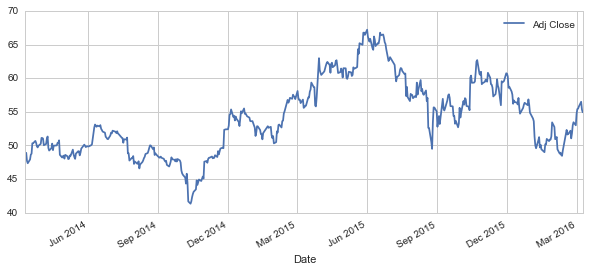

In [9]:
ADI['Adj Close'].plot(legend=True,figsize=(10,4))

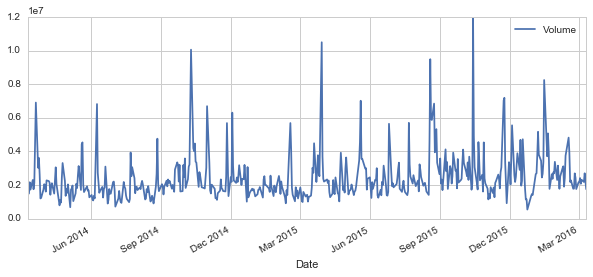

In [10]:
ADI['Volume'].plot(legend=True,figsize=(10,4))

In [11]:
ma_day = [10,20,50]
for ma in ma_day:
    column_name = 'MA for %s days'%(str(ma))
    ADI[column_name]=pd.rolling_mean(ADI['Adj Close'],ma)

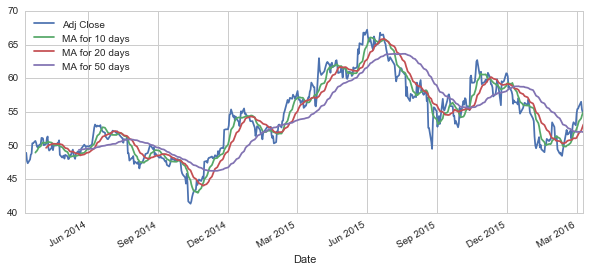

In [12]:
ADI[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

In [13]:
ADI['Daily Return']=ADI['Adj Close'].pct_change()

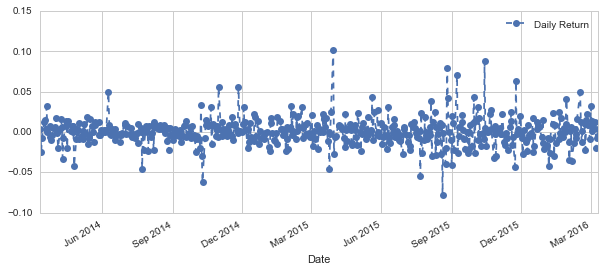

In [14]:
ADI['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

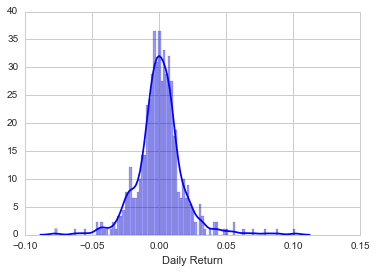

In [15]:
sns.distplot(ADI['Daily Return'].dropna(),bins=100,color='blue')

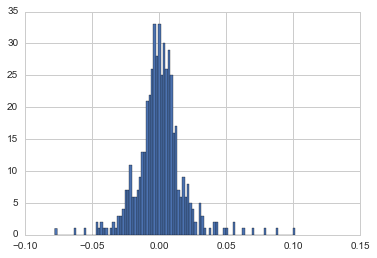

In [16]:
ADI['Daily Return'].hist(bins=100)

In [17]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [18]:
closing_df.head()

,ADI,NXPI,STM,TXN
Date,,,,
2014-03-11,48.692462,56.810001,8.398743,43.307732
2014-03-12,48.890936,57.529999,8.407803,44.028424
2014-03-13,47.681186,57.349998,8.299081,42.662909
2014-03-14,47.340943,57.619999,8.271901,42.018081
2014-03-17,47.898563,58.410000,8.380623,42.928425


In [19]:
tech_rets = closing_df.pct_change()

In [20]:
tech_rets.head()

,ADI,NXPI,STM,TXN
Date,,,,
2014-03-11,NaN,NaN,NaN,NaN
2014-03-12,0.004076,0.012674,0.001079,0.016641
2014-03-13,-0.024744,-0.003129,-0.012931,-0.031014
2014-03-14,-0.007136,0.004708,-0.003275,-0.015114
2014-03-17,0.011779,0.013711,0.013144,0.021666


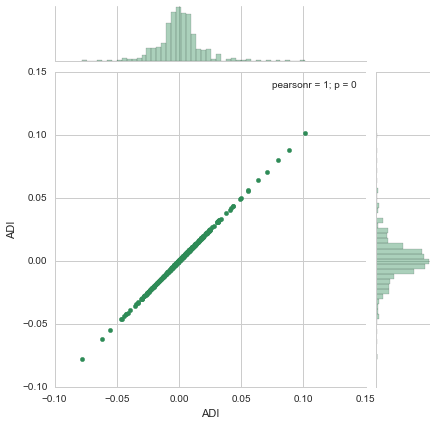

In [21]:
sns.jointplot('ADI','ADI',tech_rets,kind='scatter',color='seagreen')

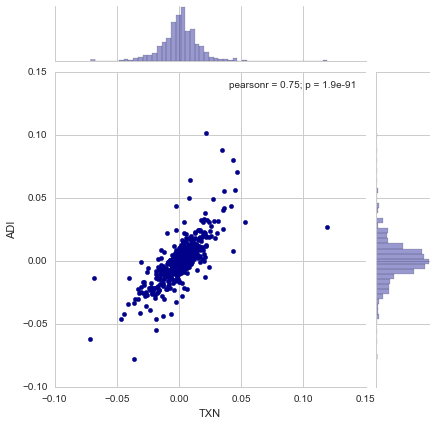

In [22]:
sns.jointplot('TXN','ADI',tech_rets,kind='scatter',color='darkblue')

In [23]:
tech_rets.head()

,ADI,NXPI,STM,TXN
Date,,,,
2014-03-11,NaN,NaN,NaN,NaN
2014-03-12,0.004076,0.012674,0.001079,0.016641
2014-03-13,-0.024744,-0.003129,-0.012931,-0.031014
2014-03-14,-0.007136,0.004708,-0.003275,-0.015114
2014-03-17,0.011779,0.013711,0.013144,0.021666


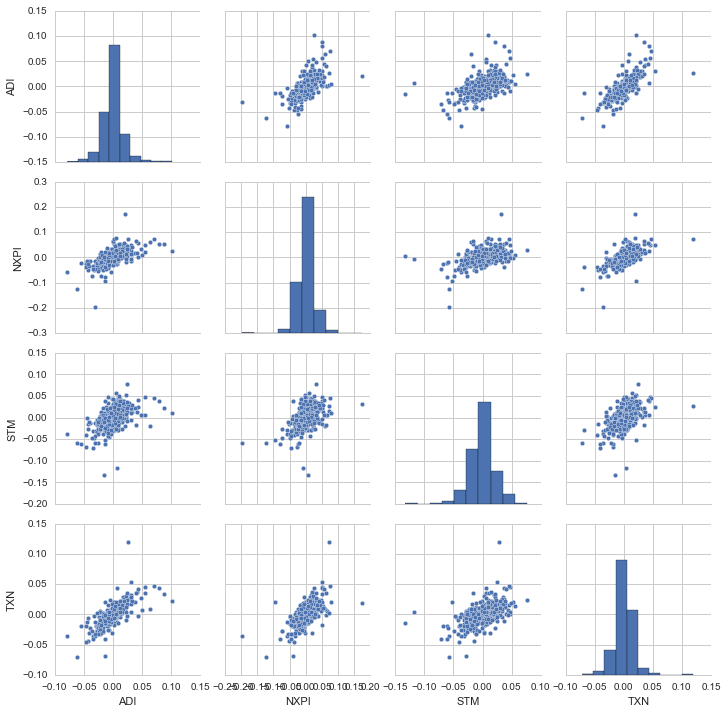

In [24]:
sns.pairplot(tech_rets.dropna())

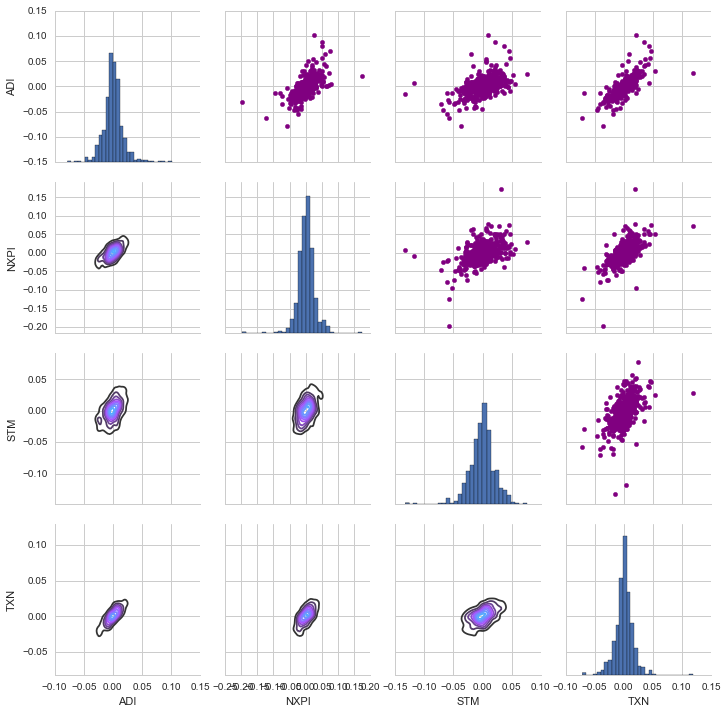

In [25]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

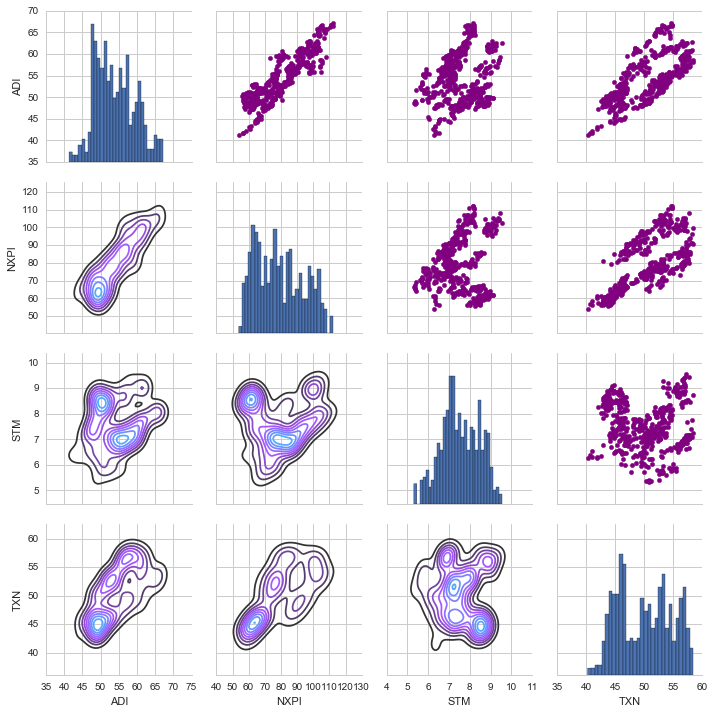

In [26]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

/Users/jonbaird/anaconda/lib/python3.5/site-packages/seaborn/linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/Users/jonbaird/anaconda/lib/python3.5/site-packages/seaborn/linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


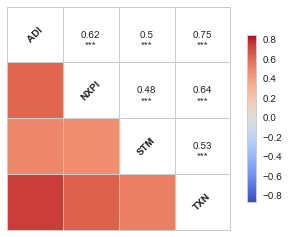

In [27]:
sns.corrplot(tech_rets.dropna(),annot=True)

/Users/jonbaird/anaconda/lib/python3.5/site-packages/seaborn/linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/Users/jonbaird/anaconda/lib/python3.5/site-packages/seaborn/linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


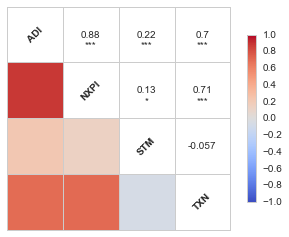

In [28]:
sns.corrplot(closing_df,annot=True)

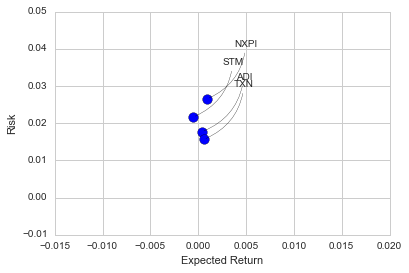

In [29]:
rets = tech_rets.dropna()
area = np.pi*30
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy = (x,y), xytext = (50,50),
    textcoords = 'offset points',ha='right', va = 'bottom',
    arrowprops = dict(arrowstyle = '-',connectionstyle='arc3,rad=-0.3'))

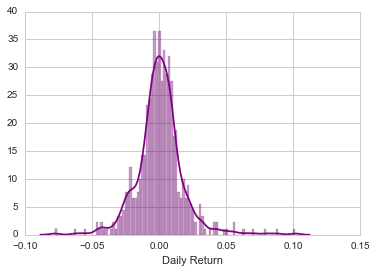

In [30]:
sns.distplot(ADI['Daily Return'].dropna(),bins=100,color='purple')

In [31]:
rets.head()

,ADI,NXPI,STM,TXN
Date,,,,
2014-03-12,0.004076,0.012674,0.001079,0.016641
2014-03-13,-0.024744,-0.003129,-0.012931,-0.031014
2014-03-14,-0.007136,0.004708,-0.003275,-0.015114
2014-03-17,0.011779,0.013711,0.013144,0.021666
2014-03-18,0.014996,0.005479,0.011892,0.002872


Value At Risk

In [32]:
rets['ADI'].quantile(0.05)

-0.025911001085580147

Monte Carlo

In [33]:
days = 5*365
dt = 1/365
mu = rets.mean()['ADI']
sigma = rets.std()['ADI']

In [34]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] + (price[x-1]*drift[x]+shock[x])
    return price

In [35]:
ADI.head()

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2014-03-11,51.849998,51.930000,51.369999,51.520000,1464900,48.692462,NaN,NaN,NaN,NaN
2014-03-12,51.180000,51.730000,51.130001,51.730000,1490500,48.890936,NaN,NaN,NaN,0.004076
2014-03-13,51.939999,51.939999,50.189999,50.450001,2162100,47.681186,NaN,NaN,NaN,-0.024744
2014-03-14,50.250000,50.849998,50.029999,50.090000,1724100,47.340943,NaN,NaN,NaN,-0.007136
2014-03-17,50.259998,50.930000,50.259998,50.680000,2297000,47.898563,NaN,NaN,NaN,0.011779


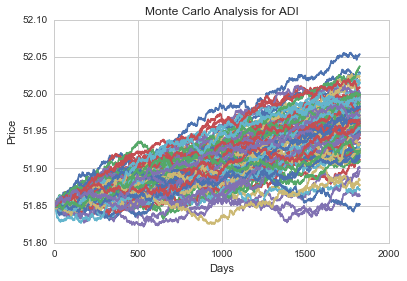

In [36]:
start_price = 51.85
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for ADI')

In [37]:
runs = 1000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

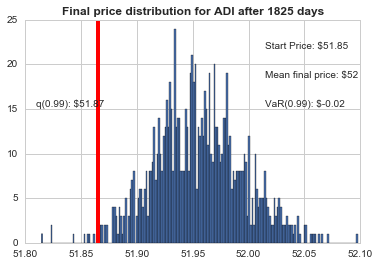

In [38]:
q = np.percentile(simulations,1)
plt.hist(simulations,bins=200)
plt.figtext(0.68,0.8,s='Start Price: $%.2f'%start_price)
plt.figtext(0.68,0.7,"Mean final price: $%2.f"%simulations.mean())
plt.figtext(0.68,0.6,"VaR(0.99): $%.2f"%(start_price-q,))
plt.figtext(0.15,0.6,"q(0.99): $%.2f"%q)
plt.axvline(x=q,linewidth=4,color='r')
plt.title(u'Final price distribution for ADI after %s days'%days,weight='bold')